# **Практика 5**

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [235]:
df = pd.read_csv('pokemon_data.csv')
df

,id,name,base_experience,height,weight,order,type_1,type_2,hp,attack,...,habitat,shape,is_legendary,is_mythical,capture_rate,base_happiness,growth_rate,egg_groups,evolution_chain,encounter_locations
0,1,bulbasaur,64,7,69,1,grass,poison,45,49,...,grassland,quadruped,0,0,45,70,medium-slow,"monster, plant",bulbasaur -> ivysaur -> venusaur,"alola-route-2-main, cerulean-city-area, lumios..."
1,2,ivysaur,142,10,130,2,grass,poison,60,62,...,grassland,quadruped,0,0,45,70,medium-slow,"monster, plant",bulbasaur -> ivysaur -> venusaur,NaN
2,3,venusaur,236,20,1000,3,grass,poison,80,82,...,grassland,quadruped,0,0,45,70,medium-slow,"monster, plant",bulbasaur -> ivysaur -> venusaur,NaN
3,4,charmander,62,6,85,5,fire,NaN,39,52,...,mountain,upright,0,0,45,70,medium-slow,"monster, dragon",charmander -> charmeleon -> charizard,"alola-route-3-main, kanto-route-24-area, lumio..."
4,5,charmeleon,142,11,190,6,fire,NaN,58,64,...,mountain,upright,0,0,45,70,medium-slow,"monster, dragon",charmander -> charmeleon -> charizard,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,drowzee,66,10,324,154,psychic,NaN,60,48,...,grassland,humanoid,0,0,190,70,medium,humanshape,drowzee -> hypno,"alola-route-2-north, alola-route-2-south, berr..."
96,97,hypno,169,16,756,155,psychic,NaN,85,73,...,grassland,humanoid,0,0,75,70,medium,humanshape,drowzee -> hypno,"berry-forest-area, cerulean-cave-1f, hauoli-ci..."
97,98,krabby,65,4,65,156,water,NaN,30,105,...,waters-edge,armor,0,0,225,70,medium,water3,krabby -> kingler,"bond-bridge-area, cerulean-city-area, cherrygr..."
98,99,kingler,166,13,600,157,water,NaN,55,130,...,waters-edge,armor,0,0,60,70,medium,water3,krabby -> kingler,"bond-bridge-area, cerulean-cave-1f, cerulean-c..."


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   100 non-null    int64 
 1   name                 100 non-null    object
 2   base_experience      100 non-null    int64 
 3   height               100 non-null    int64 
 4   weight               100 non-null    int64 
 5   order                100 non-null    int64 
 6   type_1               100 non-null    object
 7   type_2               48 non-null     object
 8   hp                   100 non-null    int64 
 9   attack               100 non-null    int64 
 10  defense              100 non-null    int64 
 11  special_attack       100 non-null    int64 
 12  special_defense      100 non-null    int64 
 13  speed                100 non-null    int64 
 14  ability_1            100 non-null    object
 15  ability_2            66 non-null     object
 16  hidden_ab

In [237]:
df.isna().sum()

,0
id,0
name,0
base_experience,0
height,0
weight,0
order,0
type_1,0
type_2,52
hp,0
attack,0


In [238]:
numerical_features = ['hp', 'attack', 'defense', 'special_attack',
                      'special_defense', 'speed', 'weight', 'height', 'base_experience']

df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

In [239]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

In [240]:
# Определение оптимального числа кластеров

k_range = range(2, 11)
wcss = []
silhouette_scores = []
k_values_for_silhouette = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

    labels = kmeans.labels_
    try:
        score = silhouette_score(scaled_data, labels)
        silhouette_scores.append(score)
        k_values_for_silhouette.append(k)
    except Exception as e:
        print(f"Ошибка при k={k}: {e}")
        silhouette_scores.append(np.nan)
        k_values_for_silhouette.append(k)

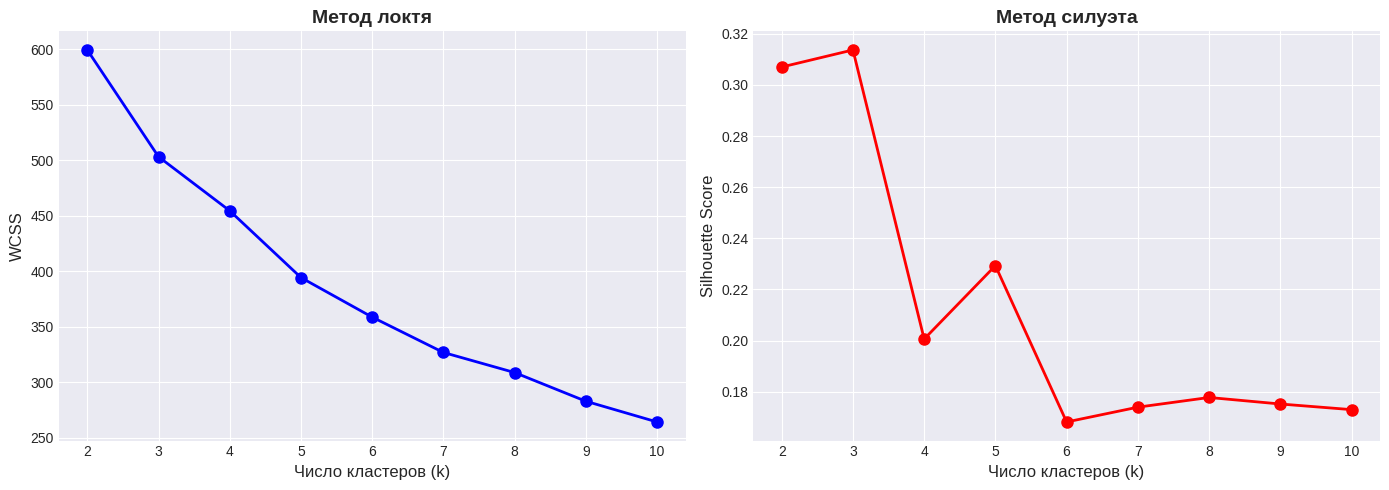

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Число кластеров (k)', fontsize=12)
ax1.set_ylabel('WCSS', fontsize=12)
ax1.set_title('Метод локтя', fontsize=14, fontweight='bold')
ax1.grid(True)

ax2.plot(k_values_for_silhouette, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Число кластеров (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Метод силуэта', fontsize=14, fontweight='bold')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [242]:
# Методы кластеризации
optimal_clusters = 3
print(f"Выбрано оптимальное число кластеров: {optimal_clusters}")

# K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(scaled_data)
print(f"K-Means: {optimal_clusters} кластера, Inertia = {kmeans.inertia_:.2f}")

# DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_data)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = sum(dbscan_labels == -1)
print(f"DBSCAN: {n_clusters_dbscan} кластер(ов), шумовых точек: {n_noise}")

# Иерархический метод
agg = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
agg_labels = agg.fit_predict(scaled_data)
print(f"Иерархический метод: {optimal_clusters} кластера")

Выбрано оптимальное число кластеров: 3
K-Means: 3 кластера, Inertia = 503.19
DBSCAN: 4 кластер(ов), шумовых точек: 68
Иерархический метод: 3 кластера


In [243]:
# Метод безразмерных комплексов

df_dim = df.copy()
# Перевод в метрические единицы
df_dim['height_m'] = df_dim['height'] * 0.1   # дм -> м
df_dim['weight_kg'] = df_dim['weight'] * 0.1  # гг -> кг

# Создаём безразмерные признаки
df_dim['atk_def_ratio'] = df_dim['attack'] / (df_dim['defense'])
df_dim['sp_atk_def_ratio'] = df_dim['special_attack'] / (df_dim['special_defense'])
df_dim['speed_balance'] = df_dim['speed'] / df_dim[['hp', 'attack', 'defense']].mean(axis=1)
#df_dim['body_density'] = df_dim['weight_kg'] / (df_dim['height_m']**3)
df_dim['exp_efficiency'] = df_dim['base_experience'] / (df_dim[['hp','attack','defense']].sum(axis=1))
df_dim['stat_variance'] = df_dim[['hp','attack','defense','speed']].std(axis=1) / df_dim[['hp','attack','defense','speed']].mean(axis=1)

dimensionless_features = [
    'atk_def_ratio', 'sp_atk_def_ratio', 'speed_balance', 'exp_efficiency', 'stat_variance'
]

# Обработка inf/nan
for col in dimensionless_features:
    df_dim[col] = df_dim[col].replace([np.inf, -np.inf], np.nan)
    df_dim[col] = df_dim[col].fillna(df_dim[col].median())

# Масштабируем
scaler_dim = StandardScaler()
scaled_dim = scaler_dim.fit_transform(df_dim[dimensionless_features])

# Кластеризация
kmeans_dim = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=20)
kmeans_dim_labels = kmeans_dim.fit_predict(scaled_dim)
print(f"Безразмерные компоненты + K-Means: {optimal_clusters} кластера")

Безразмерные компоненты + K-Means: 3 кластера


In [244]:
# 6. Визуализация
def visualize_clustering(data, labels, title, method_name):
    pca = PCA(n_components=2)
    proj = pca.fit_transform(data)

    plt.figure(figsize=(9, 6))

    if method_name == 'DBSCAN' and -1 in labels:
        noise = labels == -1
        plt.scatter(proj[~noise, 0], proj[~noise, 1], c=labels[~noise], cmap='tab20', s=60, edgecolor='k', alpha=0.8, label='Кластеры')
        plt.scatter(proj[noise, 0], proj[noise, 1], c='gray', s=30, alpha=0.4, label='Шум')
        plt.legend()
    else:
        scatter = plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap='tab20', s=60, edgecolor='k', alpha=0.8)
        plt.colorbar(scatter, label='Кластер')

    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    plt.title(f'{title}\nМетод: {method_name}', fontweight='bold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

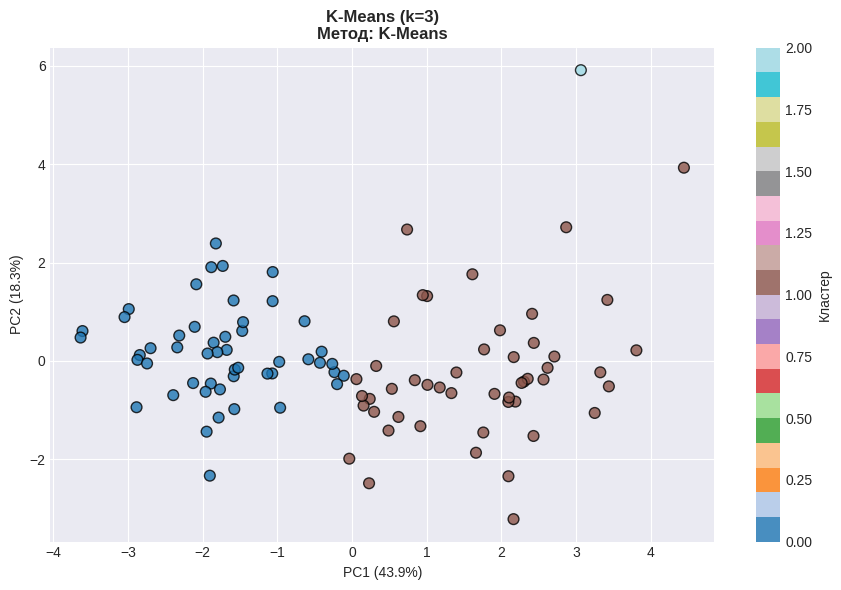

In [245]:
visualize_clustering(scaled_data, kmeans_labels, f'K-Means (k={optimal_clusters})', 'K-Means')

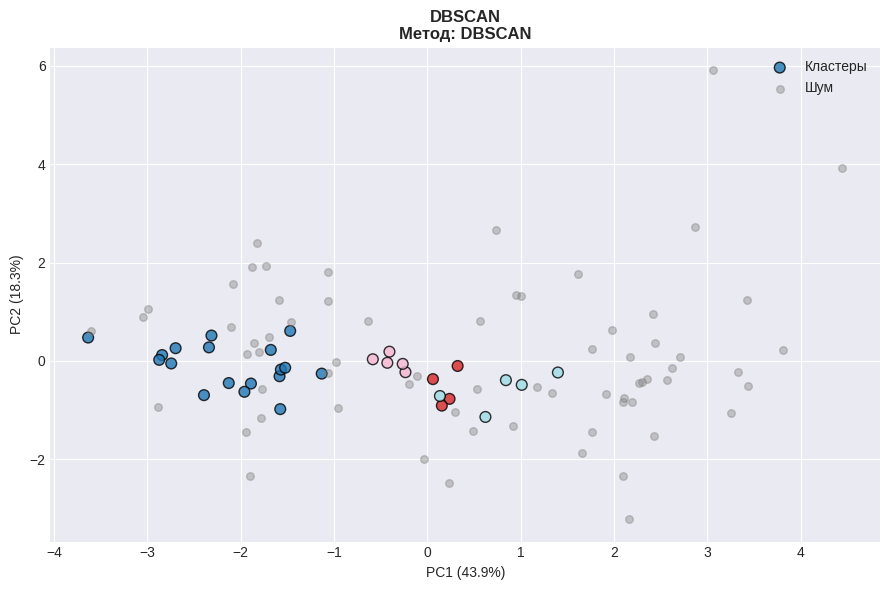

In [246]:
visualize_clustering(scaled_data, dbscan_labels, 'DBSCAN', 'DBSCAN')

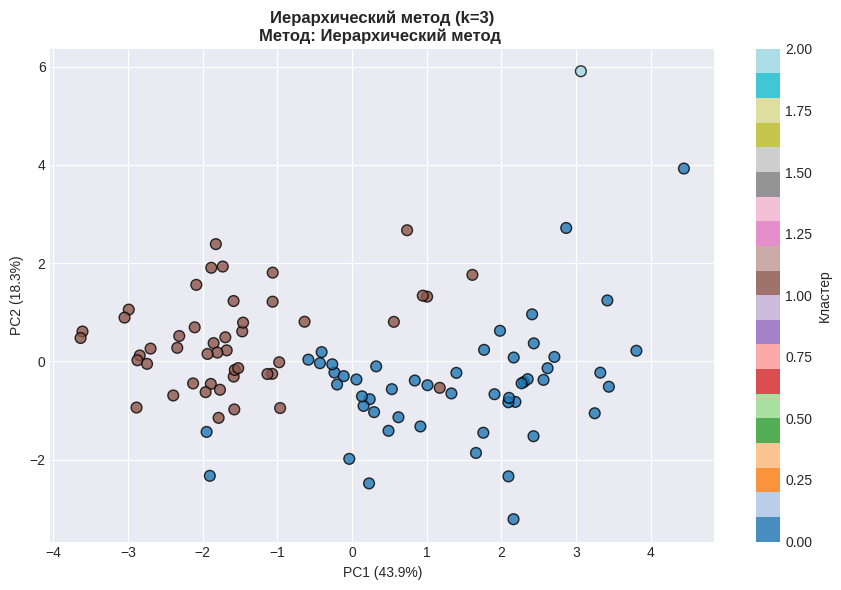

In [247]:
visualize_clustering(scaled_data, agg_labels, f'Иерархический метод (k={optimal_clusters})', 'Иерархический метод ')

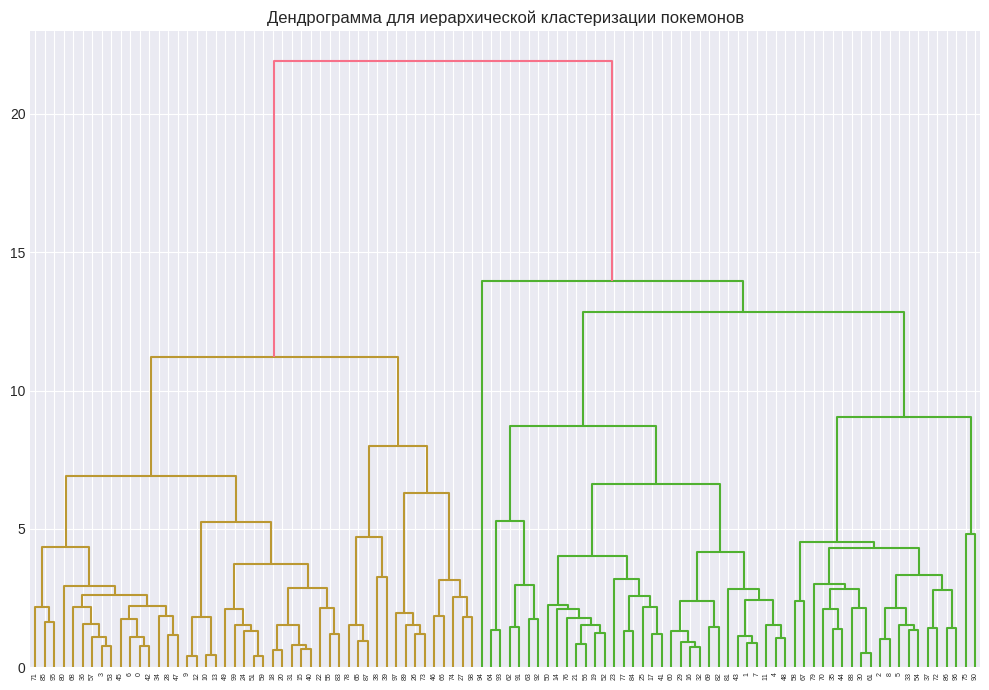

In [248]:
plt.figure(figsize=(10, 7))
plt.title('Дендрограмма для иерархической кластеризации покемонов')
Z = linkage(scaled_data, method='ward')
dendrogram(Z)
plt.grid(True)
plt.tight_layout()
plt.show()

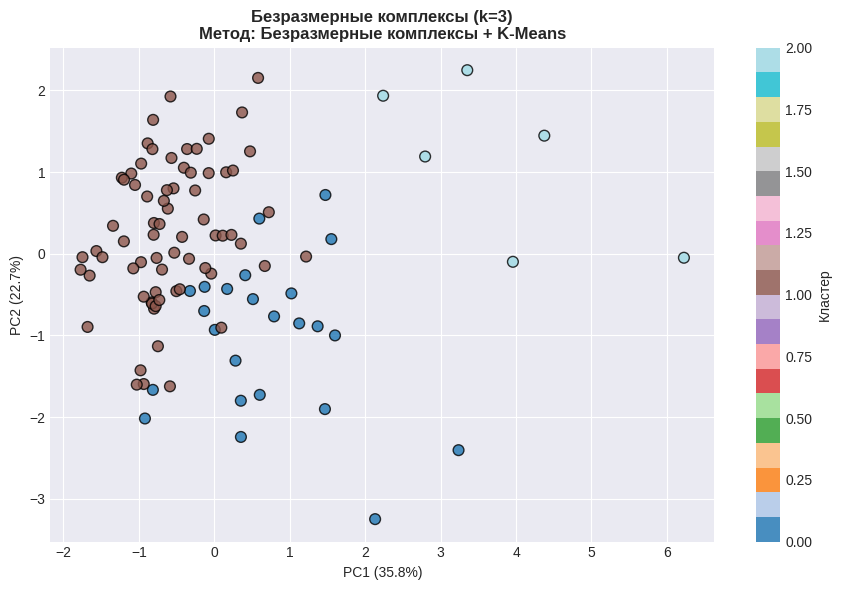

In [249]:
visualize_clustering(scaled_dim, kmeans_dim_labels, f'Безразмерные комплексы (k={optimal_clusters})', 'Безразмерные комплексы + K-Means')

In [250]:
# Сравнение методов

results = []

def safe_metric(func, data, labels):
    try:
        return func(data, labels)
    except:
        return np.nan

for (data, labels, name) in [
    (scaled_data, kmeans_labels, 'K-Means (исх.)'),
    (scaled_data, dbscan_labels, 'DBSCAN (исх.)'),
    (scaled_data, agg_labels, 'Иерархический метод (исх.)'),
    (scaled_dim, kmeans_dim_labels, 'K-Means (безразм.)')
]:
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_pct = np.round(100 * np.sum(labels == -1) / len(labels), 1) if name == 'DBSCAN (исх.)' else 0.0

    sil = safe_metric(silhouette_score, data, labels) if n_clusters > 1 else np.nan
    ch = safe_metric(calinski_harabasz_score, data, labels) if n_clusters > 1 else np.nan
    db = safe_metric(davies_bouldin_score, data, labels) if n_clusters > 1 else np.nan

    results.append({
        'Метод': name,
        'Кластеров': n_clusters,
        'Silhouette': sil,
        'Calinski-Harabasz': ch,
        'Davies-Bouldin': db,
        'Шум, %': noise_pct
    })

results_df = pd.DataFrame(results)
print(results_df.round(3).to_string(index=False))

                     Метод  Кластеров  Silhouette  Calinski-Harabasz  Davies-Bouldin  Шум, %
            K-Means (исх.)          3       0.314             38.247           0.887     0.0
             DBSCAN (исх.)          4      -0.162              3.717           2.906    68.0
Иерархический метод (исх.)          3       0.256             29.129           1.022     0.0
        K-Means (безразм.)          3       0.265             27.834           1.429     0.0


In [251]:
df['cluster_dim'] = kmeans_dim_labels

cluster_summary = df.groupby('cluster_dim').agg(
    count=('name', 'count'),
    avg_hp=('hp', 'mean'),
    avg_atk=('attack', 'mean'),
    avg_def=('defense', 'mean'),
    avg_spd=('speed', 'mean'),
    top_type=('type_1', lambda x: x.mode().iloc[0] if not x.mode().empty else '—')
).round(1)

print(cluster_summary)

             count  avg_hp  avg_atk  avg_def  avg_spd top_type
cluster_dim                                                   
0               24    58.4     79.2     46.2     71.5   normal
1               70    61.3     68.9     71.3     62.3    water
2                6    42.5     42.5     37.5    100.0    ghost
